<a href="https://colab.research.google.com/github/PaoVale/FIA/blob/master/mercoledi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREPROCESSING DEI DATI**

Prima parte del codice consiste nel filtraggio dei dati e tutto questo lo effettuaiamo nella seguente maniera:

In [ ]:
import pandas as pd

#Caricamento del dataset
file_path = 'Social_Media_Sentiment_Analysis.csv'
data = pd.read_csv(file_path)

#Siccome abbiamo posto l'attenzione su i tre social di maggiore interesse andiamo a filtrare i dati,i dati che andremo a stampare riguardano Facebook,Instagram e Twitter
filtered_data = data[data['Platform'].isin(['Facebook', 'Instagram', 'Twitter'])]

#Rimuoviamo anche gli eventuali valori nulli
filtered_data_cleaned = filtered_data.dropna()

#Rimuoviamo i valori duplicati basati su User, Platform e Post (post identici da stesso utente e piattaforma)
filtered_data_cleaned = filtered_data_cleaned.drop_duplicates(subset=['User', 'Platform', 'Post'])

#Verifichiamo se ci sono post senza testo (vuoti o contenenti solo spazi)
filtered_data_cleaned = filtered_data_cleaned[filtered_data_cleaned['Post'].str.strip() != ""]






Una volta filtrato il dataset scelto,possiamo passare alla pulizia cioè rimuovendo i social da tutto il dataset.
Quindi andiamo a costruire un nuovo dataset con i dati che ci servono

In [ ]:
#Visualizziamo il numero di post per piattaforma
platform_counts = filtered_data_cleaned['Platform'].value_counts()

#Dataset pulito:cioè andiamo a stampare i social d'interesse
print("Conteggio dei post per piattaforma:")
print(platform_counts)
print("\nAnteprima del dataset pulito:")
print(filtered_data_cleaned.reset_index(drop=True).head(20))

# Save the cleaned data to a CSV file
filtered_data_cleaned.to_csv('cleaned_data.csv', index=False)
print("File CSV pulito salvato con successo in: {'cleaned_data.csv'}")

Conteggio dei post per piattaforma:
Platform
Instagram    107
Facebook     101
Twitter       88
Name: count, dtype: int64

Anteprima del dataset pulito:
        User   Platform                                            Post  \
0   User_328   Facebook          Totally disappointed, expected better.   
1    User_13  Instagram          Totally disappointed, expected better.   
2   User_380   Facebook                      Great content on AI today!   
3   User_141  Instagram        Absolutely love the way they handled it.   
4   User_126    Twitter                    Why do people overhype this?   
5   User_115   Facebook               Neutral on this, nothing special.   
6    User_72  Instagram               Neutral on this, nothing special.   
7   User_378  Instagram  Machine Learning is the future, amazing stuff!   
8    User_53   Facebook          Totally disappointed, expected better.   
9   User_457  Instagram          Totally disappointed, expected better.   
10  User_303    Twitte

Il terzo passo consiste nella Tokenizzazione: Suddividere il testo in parole o frasi (tokens) per facilitare
l'analisi.

In [ ]:
#Installazione della libreria nltk che ci permette di effettuare la tokenizzazione della colonna dei Post
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

#scarica i dati necessari per tokenizzazione e stopwords
nltk.download('punkt')
nltk.download('stopwords')
# Download the missing 'punkt_tab' data package
nltk.download('punkt_tab') # This line is added to fix the error


# Lista di stopwords in italiano e inglese
stop_words = set(stopwords.words('english') + stopwords.words('italian'))

# Funzione per tokenizzare e rimuovere stopwords
def preprocess_post(text):
    # Rimuovi punteggiatura
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizza il testo
    tokens = word_tokenize(text)
    # Filtra i token, mantenendo solo quelli non presenti nelle stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Applica il preprocessing alla colonna 'Post'
filtered_data_cleaned['Tokens'] = filtered_data_cleaned['Post'].apply(preprocess_post)

# Visualizza un'anteprima del dataset con i token senza stopwords
print(filtered_data_cleaned[['Post', 'Tokens']].head(10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                              Post  \
0           Totally disappointed, expected better.   
2           Totally disappointed, expected better.   
3                       Great content on AI today!   
4         Absolutely love the way they handled it.   
5                     Why do people overhype this?   
6                Neutral on this, nothing special.   
7                Neutral on this, nothing special.   
8   Machine Learning is the future, amazing stuff!   
9           Totally disappointed, expected better.   
12          Totally disappointed, expected better.   

                                         Tokens  
0     [Totally, disappointed, expected, better]  
2     [Totally, disappointed, expected, better]  
3                       [Great, content, today]  
4              [Absolutely, love, way, handled]  
5                            [people, overhype]  
6                   [Neutral, nothing, special]  
7                   [Neutral, nothing, special]  
8   [

Una volta effettuata la tokenizzazione,possiamo ora salvare il tutto sul file csv e quindi otteniamo:

In [ ]:

# Salva il dataset aggiornato in un nuovo file CSV
output_file_path = 'Social_Media_Sentiment_Analysis_Tokens.csv'
filtered_data_cleaned.to_csv(output_file_path, index=False)

print(filtered_data_cleaned.reset_index(drop=True).head(20))
print(f"File CSV salvato con successo in: {output_file_path}")

        User   Platform                                            Post  \
0   User_328   Facebook          Totally disappointed, expected better.   
1    User_13  Instagram          Totally disappointed, expected better.   
2   User_380   Facebook                      Great content on AI today!   
3   User_141  Instagram        Absolutely love the way they handled it.   
4   User_126    Twitter                    Why do people overhype this?   
5   User_115   Facebook               Neutral on this, nothing special.   
6    User_72  Instagram               Neutral on this, nothing special.   
7   User_378  Instagram  Machine Learning is the future, amazing stuff!   
8    User_53   Facebook          Totally disappointed, expected better.   
9   User_457  Instagram          Totally disappointed, expected better.   
10  User_303    Twitter          Totally disappointed, expected better.   
11   User_17  Instagram                      Great content on AI today!   
12   User_16    Twitter  

**Classificazione del Sentiment**

Approccio con Vader:Libreria che ci permette di calcolare i punteggi sulla base di un approccio basato su un dizionario pre-addestrato di parole e frasi comuni, ciascuna associata a un punteggio di sentiment.                         I punteggi di VADER vengono calcolati come segue:                         Assegna a ogni parola o frase un valore compreso tra -1 (molto negativo) e +1 (molto positivo).

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Scarica il lessico di VADER
nltk.download('vader_lexicon')

# Inizializza l'analizzatore VADER
sia = SentimentIntensityAnalyzer()

# Funzione per calcolare il sentiment
def get_sentiment(post):
    sentiment_score = sia.polarity_scores(post)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applica VADER alla colonna 'Post'
filtered_data_cleaned['VADER_Sentiment'] = filtered_data_cleaned['Post'].apply(get_sentiment)

# Visualizza i risultati
print("Risultati di VADER:")
print(filtered_data_cleaned[['Post', 'VADER_Sentiment']].head(10))

Risultati di VADER:
                                              Post VADER_Sentiment
0           Totally disappointed, expected better.        Negative
2           Totally disappointed, expected better.        Negative
3                       Great content on AI today!        Positive
4         Absolutely love the way they handled it.        Positive
5                     Why do people overhype this?         Neutral
6                Neutral on this, nothing special.        Negative
7                Neutral on this, nothing special.        Negative
8   Machine Learning is the future, amazing stuff!        Positive
9           Totally disappointed, expected better.        Negative
12          Totally disappointed, expected better.        Negative


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


salviamo il file

In [ ]:
# Specify the file path where you want to save the CSV
output_file_path = 'social_media_sentiment_with_vader.csv'

# Save the DataFrame to a CSV file
filtered_data_cleaned.to_csv(output_file_path, index=False)

# Print a confirmation message
print(f"DataFrame saved to: {output_file_path}")

DataFrame saved to: social_media_sentiment_with_vader.csv


In [ ]:
def detailed_sentiment(post):
    sentiment_score = sia.polarity_scores(post)['compound']
    if sentiment_score >= 0.75:
        return 'Molto positivo'
    elif sentiment_score >= 0.25:
        return 'Moderatamente positivo'
    elif -0.25 <= sentiment_score < 0.25:
        return 'Neutro'
    elif -0.75 <= sentiment_score < -0.25:
        return 'Moderatamente negativo'
    else:
        return 'Molto negativo'

# Applica la funzione al dataset
filtered_data_cleaned['Detailed_Sentiment'] = filtered_data_cleaned['Post'].apply(detailed_sentiment)

# Visualizza un'anteprima
print(filtered_data_cleaned[['Post', 'Detailed_Sentiment']].head(10))


                                              Post      Detailed_Sentiment
0           Totally disappointed, expected better.                  Neutro
2           Totally disappointed, expected better.                  Neutro
3                       Great content on AI today!  Moderatamente positivo
4         Absolutely love the way they handled it.  Moderatamente positivo
5                     Why do people overhype this?                  Neutro
6                Neutral on this, nothing special.  Moderatamente negativo
7                Neutral on this, nothing special.  Moderatamente negativo
8   Machine Learning is the future, amazing stuff!  Moderatamente positivo
9           Totally disappointed, expected better.                  Neutro
12          Totally disappointed, expected better.                  Neutro


Classificazione Sentiment: Secondo approccio: Uitlizziamo un modello di machine learning: Ok la nostra attenzione si posa sul modello Random Forest il quale utilizza un classificatore per addestrare e valutare un sentiment basato su un dataset testuale.

In [ ]:
#rasforma i testi in una rappresentazione numerica basata sulla tecnica TF-IDF (Term Frequency-Inverse Document Frequency).
#Ogni parola nel testo viene assegnata un punteggio che tiene conto della sua importanza relativa nel documento.
from sklearn.feature_extraction.text import TfidfVectorizer
# Un classificatore basato su un insieme di alberi decisionali (forest).È utile per classificazioni non lineari e funziona bene con feature numeriche.
from sklearn.ensemble import RandomForestClassifier
#Suddivide i dati in insiemi di addestramento e test.
from sklearn.model_selection import train_test_split
#Fornisce una valutazione dettagliata del modello, includendo metriche come accuratezza, precisione, recall, e F1-score.
from sklearn.metrics import classification_report

# Rappresentazione numerica dei post:
#Converte i testi (colonna Post) in una matrice sparsa, dove ogni riga rappresenta un post e ogni colonna rappresenta una parola.
#Considera solo le 5000 parole più frequenti nel dataset per ridurre la complessità.
vectorizer = TfidfVectorizer(max_features=5000)
#Risultato: X è una matrice numerica in cui ogni riga rappresenta un post con le sue parole rappresentate da punteggi TF-IDF.
X = vectorizer.fit_transform(filtered_data_cleaned['Post'])
#y: Etichette target (colonna Sentiment) con i sentimenti corrispondenti.
y = filtered_data_cleaned['Sentiment']  # Etichette (es: molto positivo, positivo, etc.)

# Divido i dati in training e test:
#Divide i dati in training set (80%) e test set (20%),
#X_train e y_train: Dati di addestramento (testo e sentiment associato),
#X_test e y_test: Dati di test (utilizzati per valutare il modello),
#random_state=42: Garantisce che la suddivisione sia riproducibile.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Addestramento del modello Random Forest:
#RandomForestClassifier:
#Costruisce una "foresta" composta da tanti alberi decisionali.
#Ogni albero prende decisioni basate su un sottoinsieme di dati e feature.
#Combina i risultati di tutti gli alberi (voto di maggioranza) per fare una predizione finale.
#fit: Addestra il modello utilizzando i dati di training (X_train e y_train).
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Previsioni e valutazione
#predict: Genera le previsioni del modello sul set di test (X_test).
#Risultato: y_pred è un array contenente le etichette di sentiment previste per ogni post nel test set.
y_pred = clf.predict(X_test)
#classification_report: Mostra le metriche di valutazione per ciascuna classe di sentiment:
#Precision: Quanti dei sentimenti predetti sono corretti.
#Recall: Quanti dei sentimenti corretti sono stati predetti.
#F1-score: Media armonica di precision e recall.
#Accuracy: Percentuale complessiva di previsioni corrette.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.35      0.41      0.38        22
     Neutral       0.41      0.48      0.44        23
    Positive       0.29      0.13      0.18        15

    accuracy                           0.37        60
   macro avg       0.35      0.34      0.33        60
weighted avg       0.35      0.37      0.35        60



Salvataggio dei dati del Sentiment:  questo codice salva il modello e il vettorizzatore in file separati, permettendoti di caricarli e riutilizzarli senza doverli riaddestrare ogni volta.

In [ ]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Carica il modello Random Forest
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Carica il vettorizzatore TF-IDF
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)



Questo codice implementa una cross-validation per valutare le performance di un modello di Random Forest nella classificazione di sentimenti (ad esempio, "positivo", "negativo", "neutrale") all'interno di un dataset di testi. Il processo include i seguenti passaggi principali:

Preprocessing dei Testi: I testi vengono trasformati in una matrice numerica utilizzando la tecnica TF-IDF (Term Frequency-Inverse Document Frequency), che calcola il "peso" di ogni parola nei documenti in base alla sua frequenza relativa.

Creazione del Modello: Un classificatore Random Forest viene addestrato sui dati per imparare a prevedere le etichette di sentimenti. La Random Forest è un ensemble di alberi decisionali che combinano le previsioni di più alberi per migliorare l'accuratezza e ridurre il rischio di overfitting.

Cross-Validation con StratifiedKFold: Per garantire una valutazione robusta, il codice utilizza StratifiedKFold per suddividere il dataset in 5 fold. Ogni fold serve sia come set di addestramento che di test, assicurando che le classi siano distribuite equamente tra i fold.

Valutazione del Modello: Al termine di ogni ciclo di addestramento e test, viene prodotto un classification report che mostra dettagliate metriche di performance come precision, recall, F1-score e accuracy per ciascuna classe di sentimento, permettendo di analizzare come il modello si comporta su diversi tipi di sentimenti.



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# 1. Creazione della rappresentazione numerica dei testi usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(filtered_data_cleaned['Post'])
y = filtered_data_cleaned['Sentiment']

# 2. Inizializzazione del classificatore Random Forest
clf = RandomForestClassifier(random_state=42)

# 3. Creazione di StratifiedKFold per cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Cross-Validation:
for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]

    # Use .iloc to access elements based on their position:
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 5. Addestramento del modello Random Forest
    clf.fit(X_train, y_train)

    # 6. Previsioni:
    y_pred = clf.predict(X_test)

    # 7. Valutazione del modello
    print(f"Fold {fold} - Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 80)

ANALISI DELLE PIATTAFORME:Questo codice analizza la distribuzione dei sentimenti (positivo, neutro, negativo) per ciascuna piattaforma sociale nel dataset, come Twitter, Facebook e Instagram. L'analisi si svolge in tre passaggi principali:

Raggruppamento dei Dati: I dati vengono raggruppati per piattaforma e per tipo di sentimento (presente nella colonna "Sentiment" del dataset). Viene calcolato il numero di post con ciascun tipo di sentimento per ogni piattaforma.

Calcolo delle Percentuali: Per ogni piattaforma, vengono calcolate le percentuali di post con sentimenti positivi, neutri e negativi, normalizzando i conteggi in modo che la somma di ogni piattaforma sia pari al 100%.

Visualizzazione con Grafico a Barre: Un grafico a barre impilate mostra le percentuali di sentimenti per ciascuna piattaforma, permettendo di confrontare facilmente le opinioni espresse sui diversi social network.

Questo approccio aiuta a visualizzare come i sentimenti variano tra le piattaforme sociali, fornendo un'analisi utile per comprendere le differenze nei comportamenti degli utenti su ciascun canale.

<Figure size 1000x600 with 0 Axes>

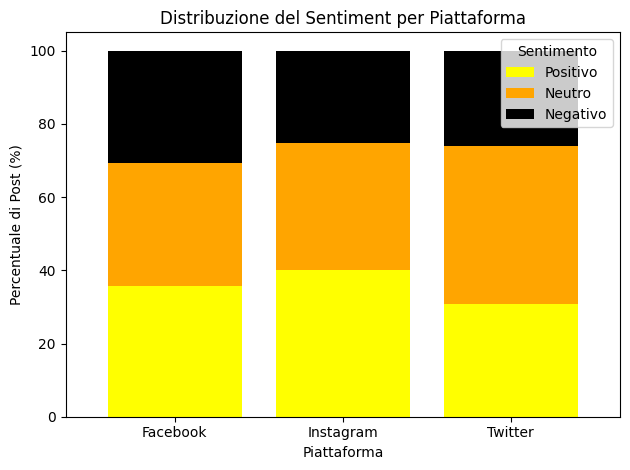

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Calcolare la distribuzione dei sentimenti per ciascuna piattaforma
# Raggruppiamo i dati in base alla piattaforma e al sentiment
sentiment_distribution = filtered_data_cleaned.groupby(['Platform', 'Sentiment']).size().unstack(fill_value=0)

# 2. Calcolare la percentuale per ciascun sentiment per piattaforma
sentiment_percentage = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

# 3. Visualizzare la distribuzione con un grafico a barre
plt.figure(figsize=(10, 6))
sentiment_percentage.plot(kind='bar', stacked=True, color=['yellow', 'orange', 'black'], width=0.8)
plt.title('Distribuzione del Sentiment per Piattaforma')
plt.xlabel('Piattaforma')
plt.ylabel('Percentuale di Post (%)')
plt.xticks(rotation=0)
plt.legend(title='Sentimento', labels=['Positivo', 'Neutro', 'Negativo'])
plt.tight_layout()
plt.show()

 Correlazione tra Engagement e Sentiment:
